In [1]:
import os
import sys
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
path = 'c:/Users/emili/Documents/complex-frogs/cs3220_A5/cs3220_A5_tasks/src' #@param {type: "string"}
sys.path.append(path)

# 1. 

Refine the given implementaion of the A* search by outputting the number of nodes expanded on the way to the goal ('green' cell) and the total cost of the path.

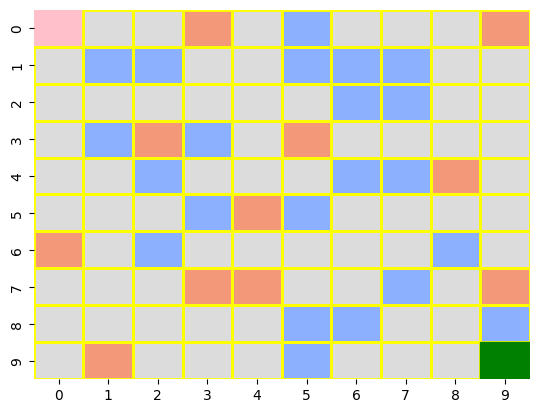

In [2]:
from mazeData import makeMaze
n=10
a=makeMaze(n)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap


def draw_maze(maze):
    fig, ax = plt.subplots()
    colors = sns.color_palette('coolwarm', len(np.unique(maze)))
    cmap = ListedColormap(colors)
    sns.heatmap(maze, cmap=cmap, annot=False, cbar=False)
    for i in range(maze.shape[0]):
      for j in range(maze.shape[1]):
        rect=patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2)
        ax.add_patch(rect)
        #plt.gca().add_patch(patches.Rectangle((j, i), 1, 1, fill=False, edgecolor='yellow', lw=2))
        if i == 0 and j == 0:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='pink')
            ax.add_patch(rect)
        if i == maze.shape[0]-1 and j == maze.shape[1]-1:
            rect=patches.Rectangle((j, i), 1, 1, fill=True, color='green')
            ax.add_patch(rect)

    plt.show()

draw_maze(a)


#safe array: ([[1, 1, 2, 1, 1, 0, 1, 1, 1, 1],
    #    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    #    [1, 1, 1, 1, 1, 1, 2, 1, 1, 0],
    #    [1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
    #    [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
    #    [1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
    #    [1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
    #    [0, 2, 1, 1, 1, 1, 1, 0, 0, 1],
    #    [0, 2, 0, 1, 1, 0, 1, 0, 1, 1],
    #    [1, 2, 1, 1, 1, 0, 1, 1, 2, 1]])

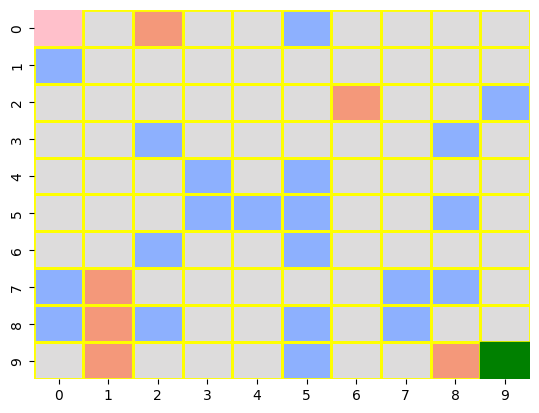

In [3]:
testArray = np.array([[1, 1, 2, 1, 1, 0, 1, 1, 1, 1],
            [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 1, 1, 1, 1, 1, 2, 1, 1, 0],
            [1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
            [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
            [1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
            [1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
            [0, 2, 1, 1, 1, 1, 1, 0, 0, 1],
            [0, 2, 0, 1, 1, 0, 1, 0, 1, 1],
            [1, 2, 1, 1, 1, 0, 1, 1, 2, 1]])

draw_maze(testArray)

In [4]:
from mazeData import defineMazeAvailableActions
from mazeData import makeMazeTransformationModel
from mazeGraphClass import mazeGraph
from mazeProblemClass import MazeProblem
from mazeData import getFoodLocation
from nodeClass import Node
import math
from agentsPrograms import A_StarSearchAgentProgram
from agents import ProblemSolvingMazeAgentAStar

mazeAvailableActs = defineMazeAvailableActions(testArray)
maze = makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph = mazeGraph(maze)
initState, goalState = (0,0), getFoodLocation(testArray)
mp1 = MazeProblem(initState,goalState,mazeWorldGraph)
node = Node(mp1.initial)
print(node.path_cost+round(math.dist(node.state, mp1.goal),2))
f1 = A_StarSearchAgentProgram(math.dist)
f1(mp1)


2.0
[(2.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(3.0, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(4.0, <Node (0, 2)>), (4.414, <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
We have found our goal: (0, 2)
Total nodes expanded: 3
Total cost: 4


<Node (0, 2)>

In [5]:
AStar_MazeAgent1 = ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalState)
AStar_MazeAgent1.goal
print(AStar_MazeAgent1((0,2)))

[(0.0, <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
We have found our goal: (0, 2)
Total nodes expanded: 1
Total cost: 0
<Node (0, 2)>
Solution (a sequence of actions) from the initial state to a goal: []
self.seq: ([], [<Node (0, 2)>])
[]


In [6]:
goalStates=[goalState, (n-1,n-1)]
AStar_MazeAgent2=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
AStar_MazeAgent2.goal
AStar_MazeAgent2.run()

goal list: [(np.int64(0), np.int64(2)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(2))
[(2.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(3.0, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(4.0, <Node (0, 2)>), (4.414, <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
We have found our goal: (0, 2)
Total nodes expanded: 3
Total cost: 4
<Node (0, 2)>
Solution (a sequence of actions) from the initial state to a goal: ['right', 'right']
[(2.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(3.0, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child

([['right', 'right'],
  ['down',
   'down',
   'right',
   'down',
   'right',
   'right',
   'right',
   'down',
   'down',
   'down',
   'down',
   'down',
   'down',
   'right',
   'right',
   'right']],
 [[<Node (0, 0)>, <Node (0, 1)>, <Node (0, 2)>],
  [<Node (np.int64(0), np.int64(2))>,
   <Node (1, 2)>,
   <Node (2, 2)>,
   <Node (2, 3)>,
   <Node (3, 3)>,
   <Node (3, 4)>,
   <Node (3, 5)>,
   <Node (3, 6)>,
   <Node (4, 6)>,
   <Node (5, 6)>,
   <Node (6, 6)>,
   <Node (7, 6)>,
   <Node (8, 6)>,
   <Node (9, 6)>,
   <Node (9, 7)>,
   <Node (9, 8)>,
   <Node (9, 9)>]])

In [7]:
goalStates=[goalState, (n-1,n-1)]
AStar_MazeAgent3=ProblemSolvingMazeAgentAStar(initState,mazeWorldGraph,goalStates)
testArray
s,p=AStar_MazeAgent3.run()

goal list: [(np.int64(0), np.int64(2)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(2))
[(2.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(3.0, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(4.0, <Node (0, 2)>), (4.414, <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
We have found our goal: (0, 2)
Total nodes expanded: 3
Total cost: 4
<Node (0, 2)>
Solution (a sequence of actions) from the initial state to a goal: ['right', 'right']
[(2.0, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(3.0, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child

# 2.

Implement a different version of the A* search which uses a Manhattan distance as the heuristic function. Compare the results with previous version of the algorithm. Visualize the path using differrent colors for its components (from the start to goal1, from the goal1 to.., etc.)

In [8]:
from agents import ProblemSolvingMazeAgentAStar2

In [9]:
Manhat_MazeAgent1=ProblemSolvingMazeAgentAStar2(initState,mazeWorldGraph,goalState)
print(Manhat_MazeAgent1((0,2)))

[(np.int64(0), <Node (0, 2)>)]
The node (0, 2) is extracted from frontier:
We have found our goal: (0, 2)
Total nodes expanded: 1
Total cost: 0
<Node (0, 2)>
Solution (a sequence of actions) from the initial state to a goal: []
self.seq: ([], [<Node (0, 2)>])
[]


In [10]:
goalStates=[goalState, (n-1,n-1)]
Manhat_MazeAgent2=ProblemSolvingMazeAgentAStar2(initState,mazeWorldGraph,goalStates)
Manhat_MazeAgent2.goal
Manhat_MazeAgent2.run()

goal list: [(np.int64(0), np.int64(2)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(2))
[(np.int64(2), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(np.int64(3), <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(np.int64(4), <Node (0, 2)>), (np.int64(5), <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
We have found our goal: (0, 2)
Total nodes expanded: 3
Total cost: 4
<Node (0, 2)>
Solution (a sequence of actions) from the initial state to a goal: ['right', 'right']
[(np.int64(2), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(np.int64(3), <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node pa

([['right', 'right'],
  ['down',
   'down',
   'right',
   'down',
   'right',
   'right',
   'right',
   'down',
   'down',
   'down',
   'down',
   'down',
   'down',
   'right',
   'right',
   'right']],
 [[<Node (0, 0)>, <Node (0, 1)>, <Node (0, 2)>],
  [<Node (np.int64(0), np.int64(2))>,
   <Node (1, 2)>,
   <Node (2, 2)>,
   <Node (2, 3)>,
   <Node (3, 3)>,
   <Node (3, 4)>,
   <Node (3, 5)>,
   <Node (3, 6)>,
   <Node (4, 6)>,
   <Node (5, 6)>,
   <Node (6, 6)>,
   <Node (7, 6)>,
   <Node (8, 6)>,
   <Node (9, 6)>,
   <Node (9, 7)>,
   <Node (9, 8)>,
   <Node (9, 9)>]])

In [11]:
goalStates=[goalState, (n-1,n-1)]
Manhat_MazeAgent3=ProblemSolvingMazeAgentAStar2(initState,mazeWorldGraph,goalStates)
s2,p2=Manhat_MazeAgent3.run()

goal list: [(np.int64(0), np.int64(2)), (9, 9)]
current percept: (0, 0)
current goal: (np.int64(0), np.int64(2))
[(np.int64(2), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(np.int64(3), <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node path cost: 4
The child node <Node (1, 1)>.
Child node path cost: 3
Nodes expanded: 2
[(np.int64(4), <Node (0, 2)>), (np.int64(5), <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
We have found our goal: (0, 2)
Total nodes expanded: 3
Total cost: 4
<Node (0, 2)>
Solution (a sequence of actions) from the initial state to a goal: ['right', 'right']
[(np.int64(2), <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
Nodes expanded: 1
[(np.int64(3), <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
Child node pa

In [12]:
p2

[[<Node (0, 0)>, <Node (0, 1)>, <Node (0, 2)>],
 [<Node (np.int64(0), np.int64(2))>,
  <Node (1, 2)>,
  <Node (2, 2)>,
  <Node (2, 3)>,
  <Node (3, 3)>,
  <Node (3, 4)>,
  <Node (3, 5)>,
  <Node (3, 6)>,
  <Node (4, 6)>,
  <Node (5, 6)>,
  <Node (6, 6)>,
  <Node (7, 6)>,
  <Node (8, 6)>,
  <Node (9, 6)>,
  <Node (9, 7)>,
  <Node (9, 8)>,
  <Node (9, 9)>]]

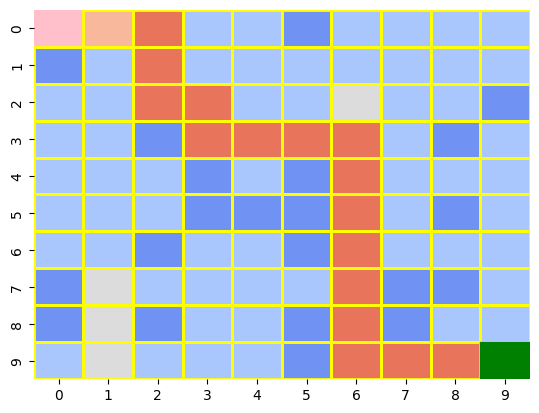

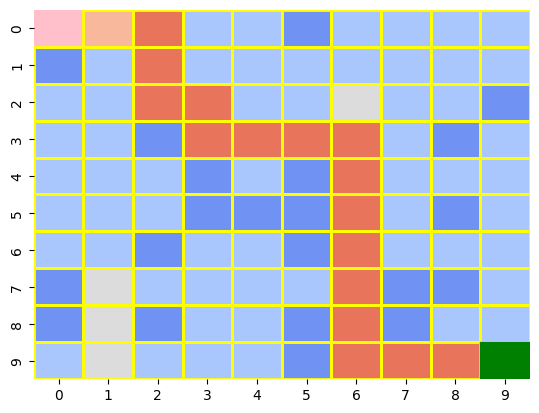

In [13]:
import copy

#Euclidean
resolvedMaze=copy.deepcopy(testArray)
i=3
for path in p:
  for node in path:
    resolvedMaze[node.state[0],node.state[1]]=i
  i+=1
draw_maze(resolvedMaze)

resolvedMaze2=copy.deepcopy(testArray)
i=3
for path2 in p2:
  for node2 in path2:
    resolvedMaze2[node2.state[0],node2.state[1] ]=i
  i+=1
draw_maze(resolvedMaze2)

# 3.

Create the refined Maze:
* the food locations are 10% of the space and distributed randomly (even the start and finish points may contain food).
* there are 5 Ghosts hidden (the Agent can't figure out the location of the GHost) in the Maze (randomly, but not in the start and finish points, the locations of Fixed Food Dots and Ghosts must also be different).

In [14]:
import random

def makeRefMaze(n):
    size = (n,n)
    proba_0 =0.2 # resulting array will have 20% of zeros/walls
    proba_food =0.1 # resulting array will have 10% of food pellets
    arrMaze=np.random.choice([0, 1,2], size=size, p=[proba_0, 1-proba_0-proba_food,proba_food])
    for i in range(5):
        while True:
            ghost = (random.randint(0, n-1), random.randint(0, n-1))
            if ghost != (0,0) and ghost != (n-1,n-1) and arrMaze[ghost[0]][ghost[1]] != 2:
                arrMaze[ghost[0]][ghost[1]] = 3
                break
    return arrMaze

refineda = makeRefMaze(10)
refineda

#safeimport random

def makeRefMaze(n):
    size = (n,n)
    proba_0 =0.2 # resulting array will have 20% of zeros/walls
    proba_food =0.1 # resulting array will have 10% of food pellets
    arrMaze=np.random.choice([0, 1,2], size=size, p=[proba_0, 1-proba_0-proba_food,proba_food])
    for i in range(5):
        while True:
            ghost = (random.randint(0, n-1), random.randint(0, n-1))
            if ghost != (0,0) and ghost != (n-1,n-1) and arrMaze[ghost[0]][ghost[1]] != 2:
                arrMaze[ghost[0]][ghost[1]] = 3
                break
    return arrMaze

refineda = makeRefMaze(10)
refineda

#safe array([[1, 1, 1, 1, 1, 1, 0, 3, 1, 0],
    #    [2, 1, 1, 2, 1, 1, 1, 1, 1, 1],
    #    [1, 1, 1, 1, 0, 2, 1, 0, 1, 2],
    #    [1, 1, 1, 3, 1, 1, 1, 1, 3, 1],
    #    [1, 0, 1, 1, 0, 1, 1, 2, 0, 1],
    #    [1, 2, 1, 1, 0, 1, 1, 1, 1, 0],
    #    [1, 1, 1, 1, 1, 2, 1, 1, 3, 1],
    #    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
    #    [1, 2, 2, 3, 0, 0, 1, 1, 1, 2],
    #    [1, 1, 1, 1, 1, 1, 0, 1, 1, 1]])

array([[1, 1, 2, 1, 1, 1, 2, 1, 1, 0],
       [1, 1, 1, 1, 2, 1, 0, 0, 1, 1],
       [3, 0, 1, 1, 1, 0, 1, 1, 0, 1],
       [1, 2, 0, 1, 0, 1, 3, 2, 1, 1],
       [1, 1, 1, 3, 0, 0, 1, 2, 1, 1],
       [1, 1, 1, 1, 1, 2, 1, 3, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 1, 1, 1, 1, 1, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [2, 1, 1, 1, 0, 1, 1, 2, 1, 0]])

In [15]:
testRefineda = np.array([[1, 1, 1, 1, 1, 1, 0, 3, 1, 0],
        [2, 1, 1, 2, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 2, 1, 0, 1, 2],
        [1, 1, 1, 3, 1, 1, 1, 1, 3, 1],
        [1, 0, 1, 1, 0, 1, 1, 2, 0, 1],
        [1, 2, 1, 1, 0, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 2, 1, 1, 3, 1],
        [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
        [1, 2, 2, 3, 0, 0, 1, 1, 1, 2],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1]])


# 4.

The Pac-man Agent must find all Fixed Food Dots and then find the finish point (the results of task 2 are supposed to be used). The search of Fixed Food Dots must be rational: the 1st 'food' goal must be the most cost-optimal among other Food Dots.

In [ ]:
fixedFood = []

for x in range(10):
    for y in range(10):
        if testRefineda[x][y] == 2:
            fixedFood.append((x, y))

fixedFood        

[(1, 0),
 (1, 3),
 (2, 5),
 (2, 9),
 (4, 7),
 (5, 1),
 (6, 5),
 (8, 1),
 (8, 2),
 (8, 9)]

In [17]:
import copy
from manhattanFunction import manhattan
sortedFixedFood = copy.deepcopy(fixedFood)
sortedFixedFood.sort(key = lambda y: manhattan((0,0), (y[0],y[1])))
sortedFixedFood #sort by manhattan heuristic function using start state

[(1, 0),
 (1, 3),
 (5, 1),
 (2, 5),
 (8, 1),
 (8, 2),
 (2, 9),
 (4, 7),
 (6, 5),
 (8, 9)]

\* will be fixing this so it updates as it searches

In [18]:
mazeAvailableActs2 = defineMazeAvailableActions(testRefineda)
maze2 = makeMazeTransformationModel(mazeAvailableActs2)
mazeWorldGraph2 = mazeGraph(maze2)

foodGoalStates = copy.deepcopy(sortedFixedFood)
foodGoalStates.append((9,9))
foodGoalAgent = ProblemSolvingMazeAgentAStar2(initState, mazeWorldGraph2, foodGoalStates)
# foodGoalAgent.run()

In [19]:
s3, p3 = foodGoalAgent.run()

goal list: [(1, 0), (1, 3), (5, 1), (2, 5), (8, 1), (8, 2), (2, 9), (4, 7), (6, 5), (8, 9), (9, 9)]
current percept: (0, 0)
current goal: (1, 0)
[(1, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(1, <Node (1, 0)>), (4, <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
We have found our goal: (1, 0)
Total nodes expanded: 2
Total cost: 1
<Node (1, 0)>
Solution (a sequence of actions) from the initial state to a goal: ['down']
[(1, <Node (0, 0)>)]
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1
[(1, <Node (1, 0)>), (4, <Node (0, 1)>)]
The node (1, 0) is extracted from frontier:
We have found our goal: (1, 0)
Total nodes expanded: 2
Total cost: 1
<Node (1, 0)>
Solution (a sequence of actions) from the initial state to a 

# 5.

The inital performance of Agent is 20% of space cells. After reaching a Fixed Food Dot the agent's performance doubles. If the Agent encounters Ghosts, it fights. But only the strong Agent (with performance > 30% of space cells) can win. Otherwise the Agent will be killed by Ghost. If the Agent wins, he will lose 10% of his previous effectiveness after the battle.

In [ ]:
# going to implement this later, didn't understand how it was supposed to be implemented originally

# 6.

Implemet IDA* or RBFS (the algorithm is assigned to the team during the lab class) search and apply it for tasks 4-5.
We are doing IDA*

In [21]:
from nodeClass import Node
from queue import PriorityQueue
from collections import deque

def limitedDepthAStarSearch(f=None):
    
    def program(problem, threshold = 9):
        
        node = Node(problem.initial)
        
        frontier = PriorityQueue()
        h=node.path_cost+round(f(node.state, problem.goal),3)
        frontier.put((h,node))
        reached = {problem.initial:node}
        nodes_expanded = 0
        
        while not frontier.empty():
            print(frontier.queue)
            depth, node = frontier.get()
            print("The node {} with cost {} is extracted from frontier:".format(node.state, depth))
            nodes_expanded += 1

            if problem.goal_test(node.state):
                print("We have found our goal: {}".format (node.state))
                print("Total nodes expanded: {}".format(nodes_expanded))
                print("Total cost: {}".format(node.path_cost))
                return node

            if depth < threshold:
                for child in node.expand(problem):
                    if child.state not in reached or child.path_cost<reached[child.state].path_cost:
                        print("The child node {}.".format(child))
                        print("Child node path cost: {}".format(child.path_cost))
                        h=child.path_cost+round(f(child.state, problem.goal),3)
                        frontier.put((h,child))
                        reached.update({child.state:child})
                print("Nodes expanded: {}".format(nodes_expanded))
            print()
        print("Failure to find goal within threshhold.")
        return None

    return program

def IDAStarSearch(f):
    def program(problem, max = 40):
        
        for threshold in range(8, max+1):
            print("threshold is at {}".format(threshold))
            check = limitedDepthAStarSearch(f)
            result = check(problem, threshold)
            
            if result is None:
                print("no solution at threshold {}".format(threshold))
                print()
                
            else:
                return result
        
        print("Failed to find solution before max threshold {}".format(threshold))
        return None   
    return program

In [22]:
from mazeProblemSolvingAgentProClass import MazeProblemSolvingAgentPro
idaGoalState = copy.deepcopy(sortedFixedFood)
idaGoalState.append((9,9))
foodIDAAgent = MazeProblemSolvingAgentPro((0,0), mazeWorldGraph2, idaGoalState, IDAStarSearch(manhattan))

In [23]:
foodIDAAgent.run()

goal list: [(1, 0), (1, 3), (5, 1), (2, 5), (8, 1), (8, 2), (2, 9), (4, 7), (6, 5), (8, 9), (9, 9)]
current percept: (0, 0)
current goal: (1, 0)
threshold is at 8
[(1, <Node (0, 0)>)]
The node (0, 0) with cost 1 is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1

[(1, <Node (1, 0)>), (4, <Node (0, 1)>)]
The node (1, 0) with cost 1 is extracted from frontier:
We have found our goal: (1, 0)
Total nodes expanded: 2
Total cost: 1
<Node (1, 0)>
Solution (a sequence of actions) from the initial state to a goal: ['down']
threshold is at 8
[(1, <Node (0, 0)>)]
The node (0, 0) with cost 1 is extracted from frontier:
The child node <Node (0, 1)>.
Child node path cost: 2
The child node <Node (1, 0)>.
Child node path cost: 1
Nodes expanded: 1

[(1, <Node (1, 0)>), (4, <Node (0, 1)>)]
The node (1, 0) with cost 1 is extracted from frontier:
We have found our goal: (1, 0)
Total nodes expanded: 2
Tot

([['down'],
  ['right', 'right', 'right'],
  ['down', 'down', 'down', 'down', 'left', 'left'],
  ['right', 'right', 'up', 'up', 'right', 'right', 'up'],
  ['down',
   'down',
   'down',
   'down',
   'left',
   'left',
   'left',
   'down',
   'down',
   'left'],
  ['right'],
  ['up',
   'up',
   'right',
   'right',
   'right',
   'right',
   'right',
   'up',
   'up',
   'up',
   'right',
   'right',
   'up'],
  ['down', 'left', 'left', 'down'],
  ['down', 'down', 'left', 'left'],
  ['down', 'right', 'down', 'right', 'right', 'right'],
  ['down']],
 [[<Node (0, 0)>, <Node (1, 0)>],
  [<Node (1, 0)>, <Node (1, 1)>, <Node (1, 2)>, <Node (1, 3)>],
  [<Node (1, 3)>,
   <Node (2, 3)>,
   <Node (3, 3)>,
   <Node (4, 3)>,
   <Node (5, 3)>,
   <Node (5, 2)>,
   <Node (5, 1)>],
  [<Node (5, 1)>,
   <Node (5, 2)>,
   <Node (5, 3)>,
   <Node (4, 3)>,
   <Node (3, 3)>,
   <Node (3, 4)>,
   <Node (3, 5)>,
   <Node (2, 5)>],
  [<Node (2, 5)>,
   <Node (3, 5)>,
   <Node (4, 5)>,
   <Node (5, 5)>,
 